In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io 

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TopAnimatedImDb.csv to TopAnimatedImDb.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['TopAnimatedImDb.csv']))


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          85 non-null     object 
 1   Rating         85 non-null     float64
 2   Votes          85 non-null     int64  
 3   Gross          35 non-null     float64
 4   Genre          85 non-null     object 
 5   Metascore      80 non-null     float64
 6   Certificate    84 non-null     object 
 7   Director       85 non-null     object 
 8   Year           85 non-null     int64  
 9   Description    85 non-null     object 
 10  Runtime (min)  85 non-null     int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 8.0+ KB


In [29]:
df.head()

,Title,Rating,Votes,Gross,Genre,Metascore,Certificate,Director,Year,Description,Runtime (min)
0,Sen to Chihiro no kamikakushi,8.6,747148,NaN,"Adventure, Family",96.0,U,Hayao Miyazaki,2001,"[""\nDuring her family's move to the suburbs, a...",125
2,Hotaru no haka,8.5,272469,0.0,"Drama, War",94.0,U,Isao Takahata,1988,['\nA young boy and his little sister struggle...,89
1,The Lion King,8.5,1041158,NaN,"Adventure, Drama",88.0,U,Roger Allers,1994,['\nLion prince Simba and his father are targe...,88
3,Kimi no na wa.,8.4,259975,NaN,"Drama, Fantasy",79.0,U,Makoto Shinkai,2016,['\nTwo strangers find themselves linked in a ...,106
5,Coco,8.4,492081,NaN,"Adventure, Comedy",81.0,U,Lee Unkrich,2017,"[""\nAspiring musician Miguel, confronted with ...",105


In [30]:
f"You have {len(df.Director.unique())} unique Directors in the data"


'You have 55 unique Directors in the data'

In [31]:

df['Rating'].describe()

count    85.000000
mean      7.922353
std       0.257449
min       7.600000
25%       7.700000
50%       7.900000
75%       8.100000
max       8.600000
Name: Rating, dtype: float64

,Rating
Director,
Tatsuya Nagamine,1
Tomm Moore,2
Travis Knight,1
Vincent Paronnaud,1
Wes Anderson,2


In [6]:
df['Runtime (min)'] = df['Runtime'].map(lambda e: e[:-4]).astype(int)
df.drop('Runtime',axis=1,inplace=True)


In [7]:
def remvzero(value):
  if str(value)=='nan':
    return 0
  else:
    value =value [1:-1]
    value= float(value)*1000000



In [8]:
import numpy as np

#df['Gross'] = df['Gross'].str.replace('$', '')
#df['Gross'] = df['Gross'].str.fillna(0)

df['Gross'] = df['Gross'].map(lambda e: remvzero(e))

#df['Gross'] = df['Gross'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval)

In [9]:
df['Votes'] = df['Votes'].replace(r'\D+', '', regex=True)
df['Votes'] = df['Votes'].fillna(0)
df['Votes'] = df['Votes'].astype(int)


In [10]:
df

,Title,Rating,Votes,Gross,Genre,Metascore,Certificate,Director,Year,Description,Runtime (min)
0,Sen to Chihiro no kamikakushi,8.6,747148,NaN,"Adventure, Family",96.0,U,Hayao Miyazaki,2001,"[""\nDuring her family's move to the suburbs, a...",125
1,The Lion King,8.5,1041158,NaN,"Adventure, Drama",88.0,U,Roger Allers,1994,['\nLion prince Simba and his father are targe...,88
2,Hotaru no haka,8.5,272469,0.0,"Drama, War",94.0,U,Isao Takahata,1988,['\nA young boy and his little sister struggle...,89
3,Kimi no na wa.,8.4,259975,NaN,"Drama, Fantasy",79.0,U,Makoto Shinkai,2016,['\nTwo strangers find themselves linked in a ...,106
4,Spider-Man: Into the Spider-Verse,8.4,510227,NaN,"Action, Adventure",87.0,U,Bob Persichetti,2018,['\nTeen Miles Morales becomes the Spider-Man ...,117
...,...,...,...,...,...,...,...,...,...,...,...
80,Kung Fu Panda,7.6,463897,NaN,"Action, Adventure",74.0,U,Mark Osborne,2008,"[""\nTo everyone's surprise, including his own,...",92
81,Mulan,7.6,284542,NaN,"Adventure, Comedy",71.0,U,Tony Bancroft,1998,"[""\nTo save her father from death in the army,...",88
82,The Little Mermaid,7.6,260026,NaN,"Adventure, Comedy",88.0,U,Ron Clements,1989,"[""\nA mermaid princess makes a Faustian bargai...",83
83,The Jungle Book,7.6,181528,NaN,"Adventure, Comedy",65.0,U,Wolfgang Reitherman,1967,['\nBagheera the Panther and Baloo the Bear ha...,78


<Figure size 1080x1440 with 0 Axes>

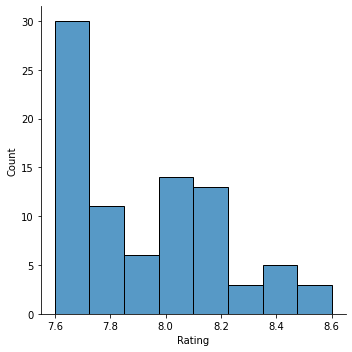

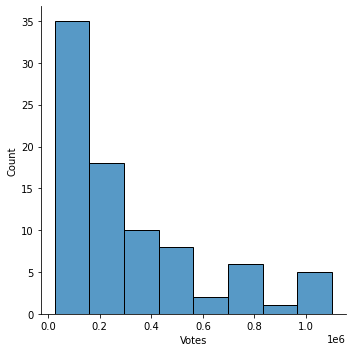

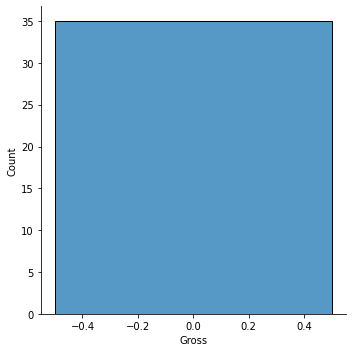

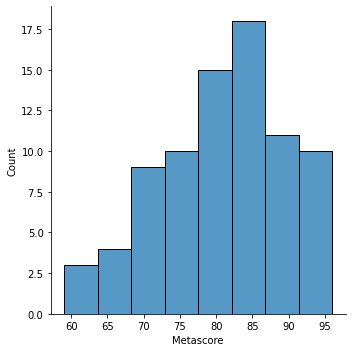

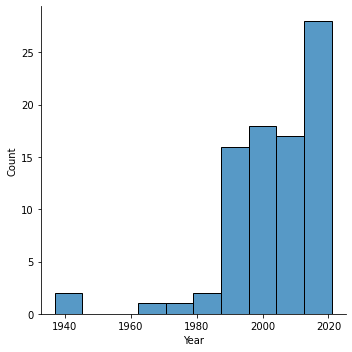

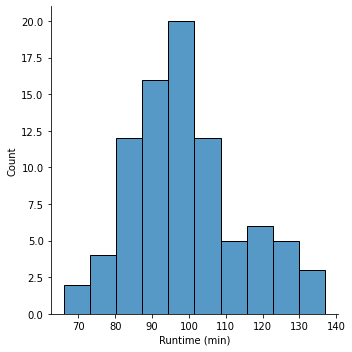

In [11]:
features = ['Rating','Votes','Gross','Metascore','Year','Runtime (min)']
plt.figure(figsize=(15,20))
for f in features:
    sns.displot(df[f])
plt.show()

In [12]:
df.nsmallest(5,'Rating')


,Title,Rating,Votes,Gross,Genre,Metascore,Certificate,Director,Year,Description,Runtime (min)
75,The Mitchells vs the Machines,7.6,105707,0.0,"Adventure, Comedy",81.0,13,Michael Rianda,2021,"[""\nA quirky, dysfunctional family's road trip...",114
76,Incredibles 2,7.6,292218,NaN,"Action, Adventure",80.0,UA,Brad Bird,2018,['\nThe Incredibles family takes on a new miss...,118
77,Moana,7.6,329295,NaN,"Adventure, Comedy",81.0,U,Ron Clements,2016,"[""\nIn Ancient Polynesia, when a terrible curs...",107
78,Despicable Me,7.6,542379,NaN,"Adventure, Comedy",72.0,U,Pierre Coffin,2010,['\nWhen a criminal mastermind uses a trio of ...,95
79,Gake no ue no Ponyo,7.6,142408,NaN,"Adventure, Comedy",86.0,U,Hayao Miyazaki,2008,['\nA five-year-old boy develops a relationshi...,101


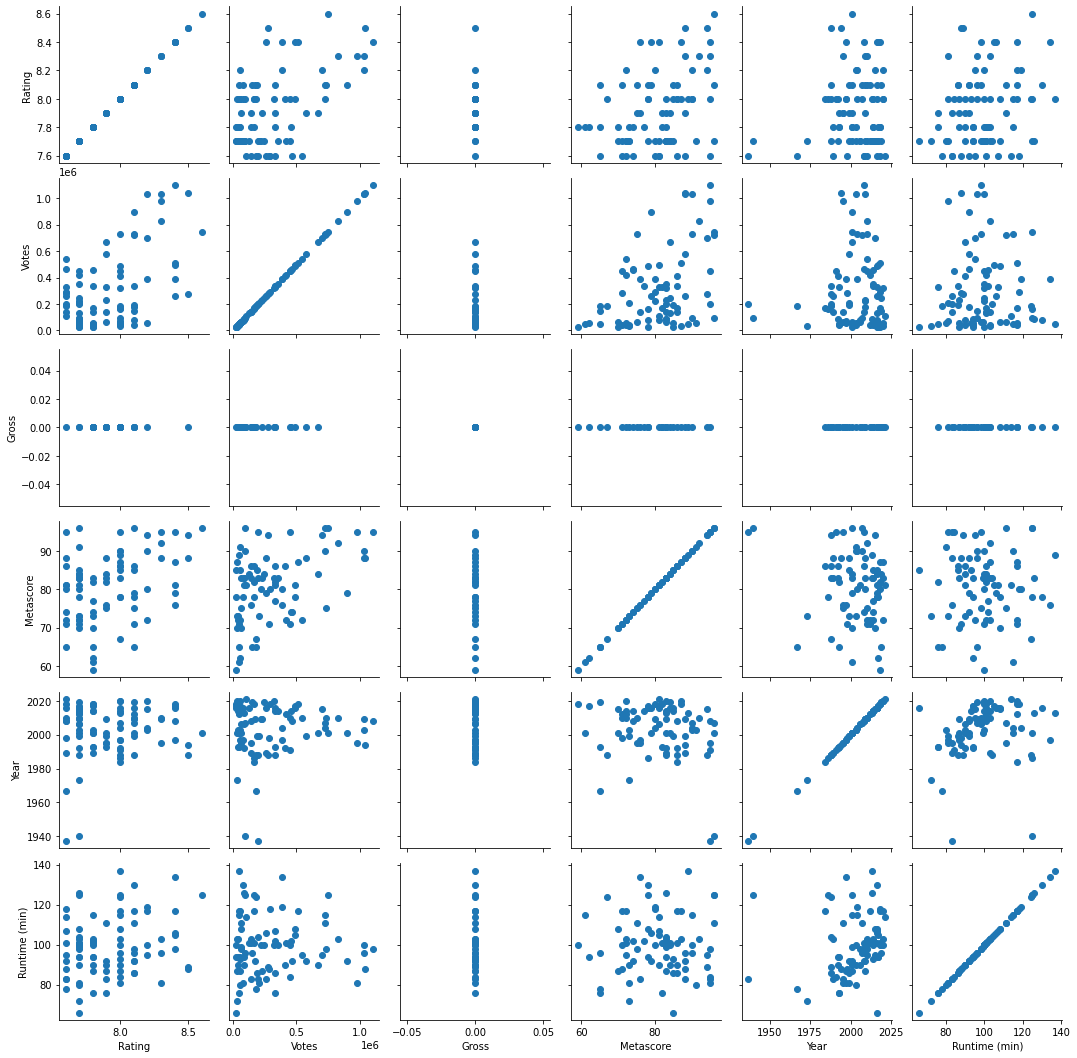

In [13]:
g = sns.PairGrid(df)
g.map(plt.scatter)

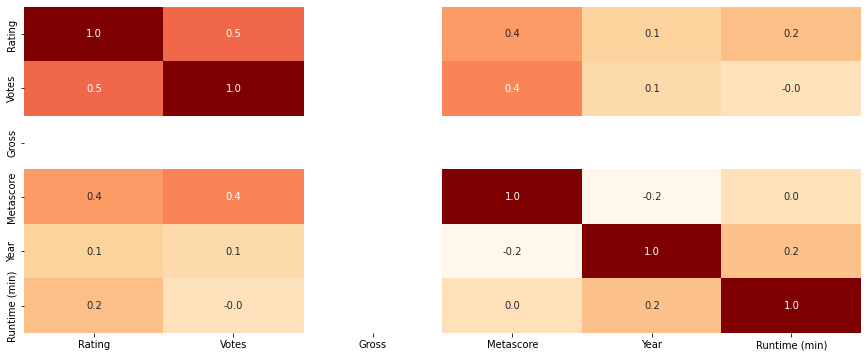

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cbar=False,cmap='OrRd',fmt='.1f')
plt.show()

In [51]:
condition = df["Year"].astype(int) >1990
Directors_rating = (df[condition][[ "Rating","Director"]]
             .groupby("Director")
             .count()
            )

Directors_rating.tail()

,Rating
Director,
Trey Parker,1
Vincent Paronnaud,1
Wes Anderson,2
Yoshiaki Kawajiri,1
Yoshifumi Kondô,1


In [59]:
dummies = df['Genre'].str.get_dummies()
dummies.head()

,"Action, Adventure","Action, Crime","Action, Drama","Adventure, Comedy","Adventure, Drama","Adventure, Family","Adventure, Fantasy","Adventure, Sci-Fi","Biography, Crime","Biography, Drama","Comedy, Drama","Comedy, Family","Comedy, Fantasy","Crime, Drama",Drama,"Drama, Family","Drama, Fantasy","Drama, War","Family, Fantasy",Sci-Fi
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
top6_genre = (df.iloc[:, 4:] # get the genre columns only
              .sum() # sum them up
              .sort_values(ascending=False) # sort descending
              .head(6) # get the first 6
              .index.values # get the genre names
              )

top6_genre

TypeError: ignored

In [15]:
import plotly.express as px
fig = px.scatter(df,
                    y="Rating", 
                    x="Year",
                    color = "Votes",
                    color_discrete_sequence = [
                 "orange", "red", "green", "blue", "purple"],
                    hover_data = ["Title"]
)

fig.update_layout(
    hoverlabel=dict(
        bgcolor="#e6ccff",
        font_size=14
    ),
    font=dict(
        color = "Purple"
    )
)

fig.show()

In [16]:
df = df.sort_values(by='Rating', ascending = False)
top_50_rated = df.head(50)
top_20_rated = df.head(20)

fig = px.bar(top_20_rated,
                   y="Title",
                   x="Rating",
                   # orientation='h',
                   height=600,
                   labels={
                           "Name" : "Anime"
                          },
                   color = "Metascore",
                   color_discrete_sequence=[
                 "orange", "red", "green", "blue", "purple"],
                   
                   orientation='h'
                  )

fig.update_traces(hovertemplate ='%{y}' + " : " + "%{x}", selector=dict(type="bar"))

fig.update_layout(
    title = "Top Rated Anime & Their Type",
    yaxis_title = "Title",
    xaxis_range=[7.6,10],
    yaxis={'categoryorder':'total ascending'},
     hoverlabel=dict(
        bgcolor="#e6ccff",
        font_size=14
    ),
    legend=dict(
        yanchor="top",
        y=0.50,
        xanchor="left",
        x=0.80,
        bgcolor="#e6ccff",
        bordercolor="purple",
        borderwidth=1
    ),
    font=dict(
        color = "Purple"
    )
)

fig.show()

In [17]:
df

,Title,Rating,Votes,Gross,Genre,Metascore,Certificate,Director,Year,Description,Runtime (min)
0,Sen to Chihiro no kamikakushi,8.6,747148,NaN,"Adventure, Family",96.0,U,Hayao Miyazaki,2001,"[""\nDuring her family's move to the suburbs, a...",125
2,Hotaru no haka,8.5,272469,0.0,"Drama, War",94.0,U,Isao Takahata,1988,['\nA young boy and his little sister struggle...,89
1,The Lion King,8.5,1041158,NaN,"Adventure, Drama",88.0,U,Roger Allers,1994,['\nLion prince Simba and his father are targe...,88
3,Kimi no na wa.,8.4,259975,NaN,"Drama, Fantasy",79.0,U,Makoto Shinkai,2016,['\nTwo strangers find themselves linked in a ...,106
5,Coco,8.4,492081,NaN,"Adventure, Comedy",81.0,U,Lee Unkrich,2017,"[""\nAspiring musician Miguel, confronted with ...",105
...,...,...,...,...,...,...,...,...,...,...,...
79,Gake no ue no Ponyo,7.6,142408,NaN,"Adventure, Comedy",86.0,U,Hayao Miyazaki,2008,['\nA five-year-old boy develops a relationshi...,101
78,Despicable Me,7.6,542379,NaN,"Adventure, Comedy",72.0,U,Pierre Coffin,2010,['\nWhen a criminal mastermind uses a trio of ...,95
77,Moana,7.6,329295,NaN,"Adventure, Comedy",81.0,U,Ron Clements,2016,"[""\nIn Ancient Polynesia, when a terrible curs...",107
76,Incredibles 2,7.6,292218,NaN,"Action, Adventure",80.0,UA,Brad Bird,2018,['\nThe Incredibles family takes on a new miss...,118


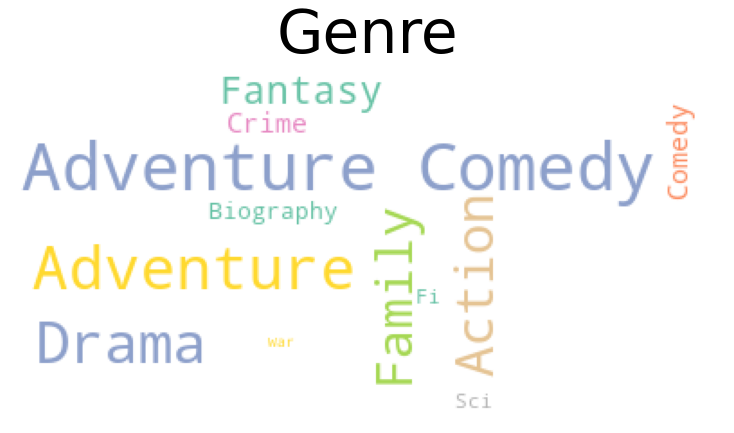

In [18]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
u_genre = ""

for i in list(df.Genre) :
    j = [k.strip() for k in i.split(",")]
    for a in j :
        if len(a.split()) > 1 :
            s = ""
            for b in a.split() :
                s += b + "_"
            u_genre += s + " "
        else :
            u_genre += a + " "

wc = WordCloud(background_color ='white', colormap = "Set2").generate(u_genre)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Genre", fontsize=60)
 
plt.show()

In [19]:
df

,Title,Rating,Votes,Gross,Genre,Metascore,Certificate,Director,Year,Description,Runtime (min)
0,Sen to Chihiro no kamikakushi,8.6,747148,NaN,"Adventure, Family",96.0,U,Hayao Miyazaki,2001,"[""\nDuring her family's move to the suburbs, a...",125
2,Hotaru no haka,8.5,272469,0.0,"Drama, War",94.0,U,Isao Takahata,1988,['\nA young boy and his little sister struggle...,89
1,The Lion King,8.5,1041158,NaN,"Adventure, Drama",88.0,U,Roger Allers,1994,['\nLion prince Simba and his father are targe...,88
3,Kimi no na wa.,8.4,259975,NaN,"Drama, Fantasy",79.0,U,Makoto Shinkai,2016,['\nTwo strangers find themselves linked in a ...,106
5,Coco,8.4,492081,NaN,"Adventure, Comedy",81.0,U,Lee Unkrich,2017,"[""\nAspiring musician Miguel, confronted with ...",105
...,...,...,...,...,...,...,...,...,...,...,...
79,Gake no ue no Ponyo,7.6,142408,NaN,"Adventure, Comedy",86.0,U,Hayao Miyazaki,2008,['\nA five-year-old boy develops a relationshi...,101
78,Despicable Me,7.6,542379,NaN,"Adventure, Comedy",72.0,U,Pierre Coffin,2010,['\nWhen a criminal mastermind uses a trio of ...,95
77,Moana,7.6,329295,NaN,"Adventure, Comedy",81.0,U,Ron Clements,2016,"[""\nIn Ancient Polynesia, when a terrible curs...",107
76,Incredibles 2,7.6,292218,NaN,"Action, Adventure",80.0,UA,Brad Bird,2018,['\nThe Incredibles family takes on a new miss...,118


In [54]:
# fig = px.funnel(top_50_rated[top_50_rated.Director],
#                 x='Director', 
#                 y='Title',
#                 color = "Votes",
#                 color_discrete_sequence=["orange", "red", "green", "blue", "purple"]
# )

# fig.update_layout(
#     title = "Directors in the top 50 rated movies",
#     yaxis_title = "Anime",
#     yaxis={'categoryorder':'total ascending'},
#     hoverlabel=dict(
#         bgcolor="#e6ccff",
#         font_size=14
#     ),
#     font=dict(
#         color = "Purple"
#     )
# )

# fig.show()

In [72]:
movies_average_rating=df.groupby('Title')['Rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'Rating':'Average Rating'})
movies_average_rating.head()

,Title,Average Rating
0,Sen to Chihiro no kamikakushi,8.6
1,Hotaru no haka,8.5
2,The Lion King,8.5
3,Coco,8.4
4,Spider-Man: Into the Spider-Verse,8.4


In [73]:
movies_rating_count=df.groupby('Title')['Rating'].count().sort_values(ascending=True).reset_index().rename(columns={'Rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='Title')
movies_rating_count_avg.head()

,Title,Rating Count,Average Rating
0,Akira,1,8.0
1,Tenkû no shiro Rapyuta,1,8.0
2,Tangled,1,7.7
3,Spider-Man: Into the Spider-Verse,1,8.4
4,"South Park: Bigger, Longer & Uncut",1,7.7


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1)
plt.rcParams["axes.grid"] = False
plt.style.use('dark_background')
%matplotlib inline



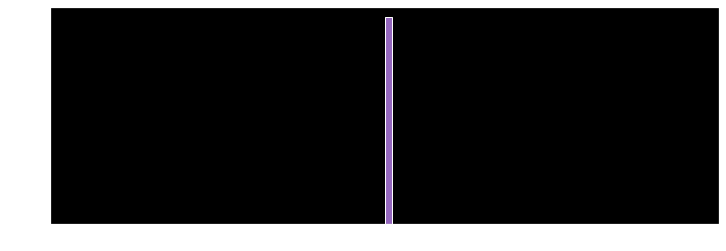

In [76]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Rating Count'],bins=80,color='tab:purple')
plt.ylabel('Ratings Count(Scaled)', fontsize=16)
plt.savefig('ratingcounthist.jpg')

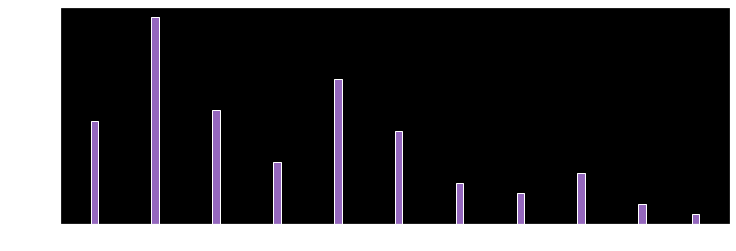

In [77]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Average Rating'],bins=80,color='tab:purple')
plt.ylabel('Average Rating',fontsize=16)
plt.savefig('avgratinghist.jpg')


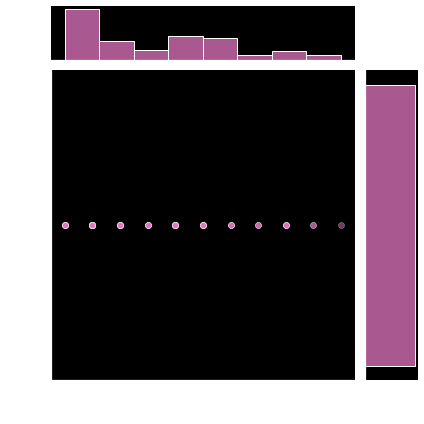

In [79]:
plot=sns.jointplot(x='Average Rating',y='Rating Count',data=movies_rating_count_avg,alpha=0.5, color='tab:pink')
plot.savefig('joinplot.jpg')

In [81]:
print(df['Votes'].describe())

count    8.500000e+01
mean     3.006807e+05
std      2.856683e+05
min      2.531900e+04
25%      6.608100e+04
50%      1.978600e+05
75%      4.474470e+05
max      1.100175e+06
Name: Votes, dtype: float64


In [82]:
popularity_threshold = 3.006807e+05
popular_movies= df[df['Votes']>=popularity_threshold]
popular_movies.head()

,Title,Rating,Votes,Gross,Genre,Metascore,Certificate,Director,Year,Description,Runtime (min)
0,Sen to Chihiro no kamikakushi,8.6,747148,NaN,"Adventure, Family",96.0,U,Hayao Miyazaki,2001,"[""\nDuring her family's move to the suburbs, a...",125
1,The Lion King,8.5,1041158,NaN,"Adventure, Drama",88.0,U,Roger Allers,1994,['\nLion prince Simba and his father are targe...,88
5,Coco,8.4,492081,NaN,"Adventure, Comedy",81.0,U,Lee Unkrich,2017,"[""\nAspiring musician Miguel, confronted with ...",105
6,WALL·E,8.4,1100175,NaN,"Adventure, Family",95.0,U,Andrew Stanton,2008,"['\nIn the distant future, a small waste-colle...",98
7,Mononoke-hime,8.4,388925,NaN,"Adventure, Fantasy",76.0,U,Hayao Miyazaki,1997,"[""\nOn a journey to find the cure for a Tatari...",134


USING KNN MODEL TO RECOMMEND THE NEXT MOVIE YOU WANT TO WATCH

In [91]:
import os
movie_features_df=df.pivot_table(index='Title',columns='Runtime (min)',values='Rating').fillna(0)
movie_features_df.head()
#movie_features_df.to_excel('output.xlsx')

Runtime (min),66,72,76,78,80,81,83,84,86,87,...,115,117,118,119,124,125,126,130,134,137
Title,,,,,,,,,,,,,,,,,,,,,
Akira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
Aladdin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Batman: Mask of the Phantasm,0.0,0.0,7.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beauty and the Beast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Big Hero 6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [93]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [94]:
movie_features_df.shape


(85, 41)

In [102]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

67


In [103]:
movie_features_df.head()


Runtime (min),66,72,76,78,80,81,83,84,86,87,...,115,117,118,119,124,125,126,130,134,137
Title,,,,,,,,,,,,,,,,,,,,,
Akira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
Aladdin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Batman: Mask of the Phantasm,0.0,0.0,7.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beauty and the Beast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Big Hero 6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Little Mermaid:

1: The Little Mermaid, with distance of 0.0:
2: Kôkaku Kidôtai, with distance of 0.0:
3: South Park: Bigger, Longer & Uncut, with distance of 1.0:
4: Soul, with distance of 1.0:
5: Tenkû no shiro Rapyuta, with distance of 1.0:
